In [1]:
#basic statistics
import numpy as np
from sklearn import tree
import pydot	# It requires installing pydot and graphviz
import matplotlib.pyplot as plt
import pandas as pd

#read file
df = pd.read_csv('data.txt', names=["sepal length","sepal width","petal length","petal width","target"])
df['target'] = df['target'].str.replace("Iris-setosa","0").str.replace("Iris-versicolor","1").str.replace("Iris-virginica","2")
df = pd.DataFrame(df,dtype=np.float)  #change dataframe type
print((df.describe()))
iris = np.array(df)  #convert to ndarray
X = iris[:,0:4]   #split data
y = iris[:,4]

       sepal length  sepal width  petal length  petal width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


Decision tree with resubstitution validation:


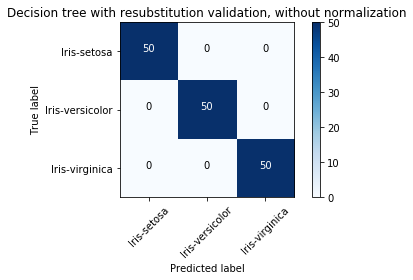

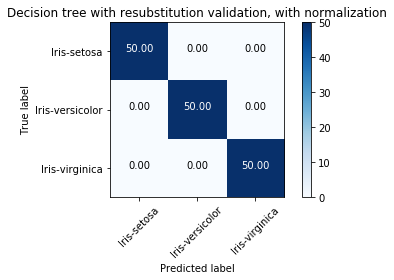

accuracy = 1.0

Performance: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [2]:
#decision tree with resubstitution
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dt_pred = clf.predict(X)

# Visualization  (tree->dot file->image file)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('r_tree.png')


print("Decision tree with resubstitution validation:")
#function to draw confution matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y, dt_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision tree with resubstitution validation, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Decision tree with resubstitution validation, with normalization')

plt.show()
print("accuracy = {0}\n".format(accuracy_score(y,dt_pred)))
print("Performance: ")
print(classification_report(y, dt_pred, target_names=class_names))

Random forest with resubstitution validation:


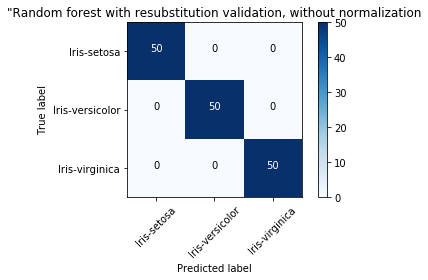

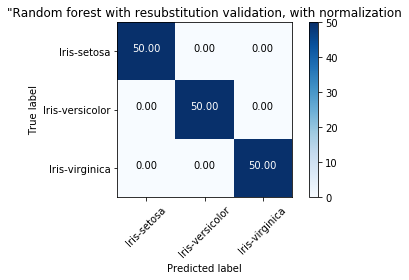

accuracy = 1.0

Performance: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

    avg / total       1.00      1.00      1.00       150



In [3]:
#random forest with resubstitution
from scipy import stats
#choose three features everytime and create four decision trees
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
dt1 = tree.DecisionTreeClassifier()
dt1_pred = dt1.fit(X[:,:3],y).predict(X[:,:3])
dt2 = tree.DecisionTreeClassifier()
dt2_pred = dt2.fit(X[:,1:4], y).predict(X[:,1:4])
dt3 = tree.DecisionTreeClassifier()
dt3_pred = dt3.fit(X[:,[0,2,3]], y).predict(X[:,[0,2,3]])
dt4 = tree.DecisionTreeClassifier()
dt4_pred = dt4.fit(X[:,[0,1,3]], y).predict(X[:,[0,1,3]])


# Visualization tree123  (tree->dot file->image file)
dot_data = tree.export_graphviz(dt1, out_file=None, 
                         feature_names=feature_names[0:3],  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('r_tree123.png')

# Visualization tree234  (tree->dot file->image file)
dot_data = tree.export_graphviz(dt2, out_file=None, 
                         feature_names=feature_names[1:4],  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('r_tree234.png')
# Visualization tree134  (tree->dot file->image file)

feature_names134 = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']
dot_data = tree.export_graphviz(dt3, out_file=None, 
                         feature_names=feature_names134,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('r_tree134.png')
feature_names124 = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']

# Visualization  tree124  (tree->dot file->image file)
dot_data = tree.export_graphviz(dt4, out_file=None, 
                         feature_names=feature_names124,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data)
graph.write_png('r_tree124.png')


#merge four prediction results from the above trees and find the mode of each column
rf = np.vstack((dt1_pred,dt2_pred,dt3_pred,dt4_pred))
rf_mode = stats.mode(rf)
rf_mode = rf_mode.mode[0]

print("Random forest with resubstitution validation:")
cnf_matrix = confusion_matrix(y,rf_mode)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='"Random forest with resubstitution validation, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='"Random forest with resubstitution validation, with normalization')

plt.show()
print("accuracy = {0}\n".format(accuracy_score(y,rf_mode)))
print("Performance: ")
print(classification_report(y, rf_mode, target_names=class_names))

Decision tree with k-fold cross validation:


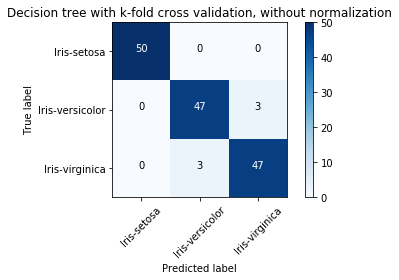

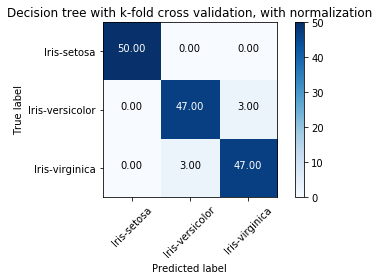

accuracy = 0.96

Performance: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

    avg / total       0.96      0.96      0.96       150



In [4]:
#decision tree with k-fold cross validation
from sklearn.model_selection import cross_val_predict


clf_k = tree.DecisionTreeClassifier()
#use the cross validation function, 'cv=6' means split the training data into 6 group
dt_k_pred = cross_val_predict(clf_k, X, y, cv=6)


print("Decision tree with k-fold cross validation:")
cnf_matrix = confusion_matrix(y, dt_k_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision tree with k-fold cross validation, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Decision tree with k-fold cross validation, with normalization')

plt.show()
print("accuracy = {0}\n".format(accuracy_score(y,dt_k_pred)))
print("Performance: ")
print(classification_report(y, dt_k_pred, target_names=class_names))

Random forest with k-fold cross validation:


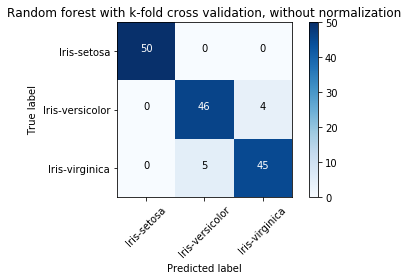

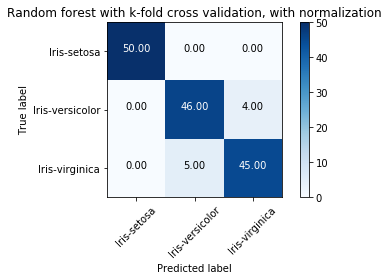

accuracy = 0.94

Performance: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.90      0.92      0.91        50
 Iris-virginica       0.92      0.90      0.91        50

    avg / total       0.94      0.94      0.94       150



In [5]:
#random forest with k-fold cross validation
#choose three feature everytime and create four decision trees


flag=0
for i in range (0,4):
    for j in range (i+1,4):
        x_tf = np.delete(X, np.s_[i,j], axis=1)
        dt = tree.DecisionTreeClassifier()
        dt_pred = cross_val_predict(dt,x_tf,y,cv = 6)
        if flag == 0:
            rf_k = dt_pred
            flag = 1
        else:
            rf_k = np.vstack((rf_k,dt_pred))
            
#merge four prediction results from the above trees and find the mode of each column
rf_k_mode = stats.mode(rf_k)
rf_k_mode = rf_k_mode.mode[0]

print("Random forest with k-fold cross validation:")
cnf_matrix = confusion_matrix(y, rf_k_mode)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random forest with k-fold cross validation, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Random forest with k-fold cross validation, with normalization')

plt.show()
print("accuracy = {0}\n".format(accuracy_score(y,rf_k_mode)))
print("Performance: ")
print(classification_report(y, rf_k_mode, target_names=class_names))